In [13]:
import tensorflow as tf

In [14]:
print(f'wersja tensorflow: {tf.__version__}')

wersja tensorflow: 2.10.1


In [15]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


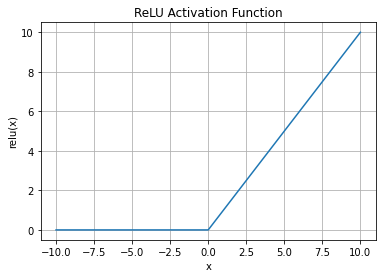

In [19]:

import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 1000)
plt.plot(x, relu(x))
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.show()

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy)]

In [23]:
# The fit method will start the training of the model
# We use x_train and y_train as our data, and specify 5 for the number of epochs.
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2979 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1444 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0898 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0768 - accuracy: 0.9759


In [24]:
# evaluate model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

313/313 - 0s - loss: 0.0718 - accuracy: 0.9783 - 414ms/epoch - 1ms/step
Test accuracy: 0.9782999753952026
Test loss: 0.07178613543510437


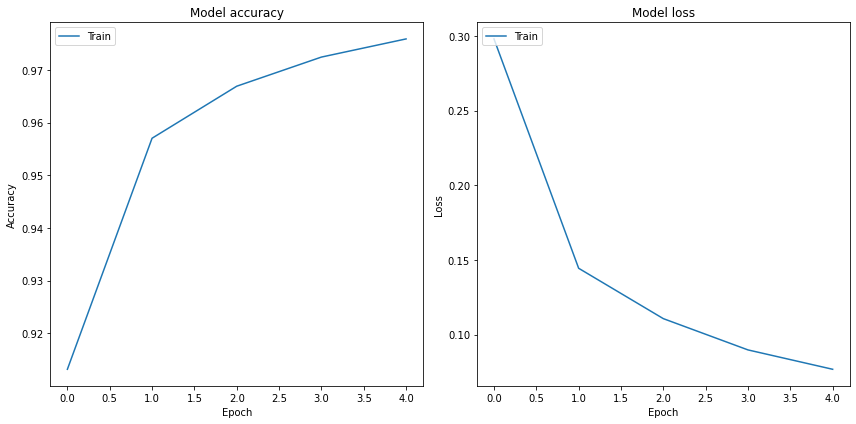

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.tight_layout()
plt.show()

The Python script that you have run suggests that you are using a simple feed-forward neural network model from TensorFlow, specifically Keras, trained and evaluated on the MNIST dataset. You have also given a graphical representation of the ReLU activation function, which is in use by one of your Dense layers.

The model consists of several layers - a Flatten layer that reshapes each input into a 1D array, a Dense layer with 128 nodes with ReLU (rectified linear unit) activation, a Dropout layer which helps to control overfitting by randomly setting a fraction of the inputs to zero during training, and finally a Dense layer with ten output nodes.

The ReLU function, visualized in one of your plots, activates the neuron only if the input is above a certain level (in this case 0). This is evident from the linear positive ramp for x > 0, and zero otherwise.

The model is compiled with the Adam optimizer, Sparse Categorical Crossentropy for loss calculation, and accuracy as its metric. Moreover, the model is trained for 5 epochs.

Results from your `model.evaluate()` method on test data show the test accuracy and test loss. The accuracy indicates how often the neural network makes a correct prediction, while the loss indicates how far off the model's predictions are from the actual values. 

In the final plots, you have visualized the model's training performance over the epochs: one for accuracy and another for loss. It can be observed how the model's performance improved, which would more be evident by the decreasing loss and increasing accuracy with each passing epoch.

At this stage, post the initial analysis and model training, your next steps might be considering ways to enhance the computational efficiency and/or predictive accuracy of the model. This can be done through hyperparameter tuning, experimenting with different architectures, or applying more advanced optimization techniques. Nevertheless, progressing further would require taking into consideration the results produced so far.